In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [2]:
data = pd.read_csv ("train_data.csv")
data

Unnamed: 0  PassengerId  Survived  Sex     Age      Fare  Pclass_1  \
0             0            1         0    1  0.2750  0.014151         0   
1             1            2         1    0  0.4750  0.139136         1   
2             2            3         1    0  0.3250  0.015469         0   
3             3            4         1    0  0.4375  0.103644         1   
4             4            5         0    1  0.4375  0.015713         0   
..          ...          ...       ...  ...     ...       ...       ...   
787         787          788         0    1  0.1000  0.056848         0   
788         788          789         1    1  0.0125  0.040160         0   
789         789          790         0    1  0.5750  0.154588         1   
790         790          791         0    1  0.3500  0.015127         0   
791         791          792         0    1  0.2000  0.050749         0   

     Pclass_2  Pclass_3  Family_size  Title_1  Title_2  Title_3  Title_4  \
0           0         1          0.1        1        0        0        0   
1           0         0          0.1        1        0        0        0   
2           0         1          0.0        0        0        0        1   
3           0         0          0.1        1        0        0        0   
4           0         1          0.0        1        0        0        0   
..        ...       ...          ...      ...      ...      ...      ...   
787         0         1          0.5        0        0        1        0   
788         0         1          0.3        0        0        1        0   
789         0         0          0.0        1        0        0        0   
790         0         1          0.0        1        0        0        0   
791         1         0          0.0        1        0        0        0   

     Emb_1  Emb_2  Emb_3  
0        0      0      1  
1        1      0      0  
2        0      0      1  
3        0      0      1  
4        0      0      1  
..     ...    ...    ...  
787      0      1      0  
788      0      0      1  
789      1      0      0  
790      0      1      0  
791      0      0      1  

[792 rows x 17 columns]

on va supprimer la première colonne (Unnamed) et la seconde colonne (PassengerId), ce ne sont que des répétitions de la colonne index.

In [3]:
data.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Sex', 'Age', 'Fare',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2',
       'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3'],
      dtype='object')

In [4]:
data = data.drop(data.columns[0], axis = 1)
data = data.drop(data.columns[0], axis = 1)
data

Survived  Sex     Age      Fare  Pclass_1  Pclass_2  Pclass_3  \
0           0    1  0.2750  0.014151         0         0         1   
1           1    0  0.4750  0.139136         1         0         0   
2           1    0  0.3250  0.015469         0         0         1   
3           1    0  0.4375  0.103644         1         0         0   
4           0    1  0.4375  0.015713         0         0         1   
..        ...  ...     ...       ...       ...       ...       ...   
787         0    1  0.1000  0.056848         0         0         1   
788         1    1  0.0125  0.040160         0         0         1   
789         0    1  0.5750  0.154588         1         0         0   
790         0    1  0.3500  0.015127         0         0         1   
791         0    1  0.2000  0.050749         0         1         0   

     Family_size  Title_1  Title_2  Title_3  Title_4  Emb_1  Emb_2  Emb_3  
0            0.1        1        0        0        0      0      0      1  
1            0.1        1        0        0        0      1      0      0  
2            0.0        0        0        0        1      0      0      1  
3            0.1        1        0        0        0      0      0      1  
4            0.0        1        0        0        0      0      0      1  
..           ...      ...      ...      ...      ...    ...    ...    ...  
787          0.5        0        0        1        0      0      1      0  
788          0.3        0        0        1        0      0      0      1  
789          0.0        1        0        0        0      1      0      0  
790          0.0        1        0        0        0      0      1      0  
791          0.0        1        0        0        0      0      0      1  

[792 rows x 15 columns]

In [5]:
data.count()

Survived       792
Sex            792
Age            792
Fare           792
Pclass_1       792
Pclass_2       792
Pclass_3       792
Family_size    792
Title_1        792
Title_2        792
Title_3        792
Title_4        792
Emb_1          792
Emb_2          792
Emb_3          792
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     792 non-null    int64  
 1   Sex          792 non-null    int64  
 2   Age          792 non-null    float64
 3   Fare         792 non-null    float64
 4   Pclass_1     792 non-null    int64  
 5   Pclass_2     792 non-null    int64  
 6   Pclass_3     792 non-null    int64  
 7   Family_size  792 non-null    float64
 8   Title_1      792 non-null    int64  
 9   Title_2      792 non-null    int64  
 10  Title_3      792 non-null    int64  
 11  Title_4      792 non-null    int64  
 12  Emb_1        792 non-null    int64  
 13  Emb_2        792 non-null    int64  
 14  Emb_3        792 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 92.9 KB


Les colonnes sont totalement pleines il n'y a point de cases vides, on peut donc procéder à faire notre étude sans faire un travail de préprocessing.

#### Faisons une petite visualisation des données avant de passer au modelling

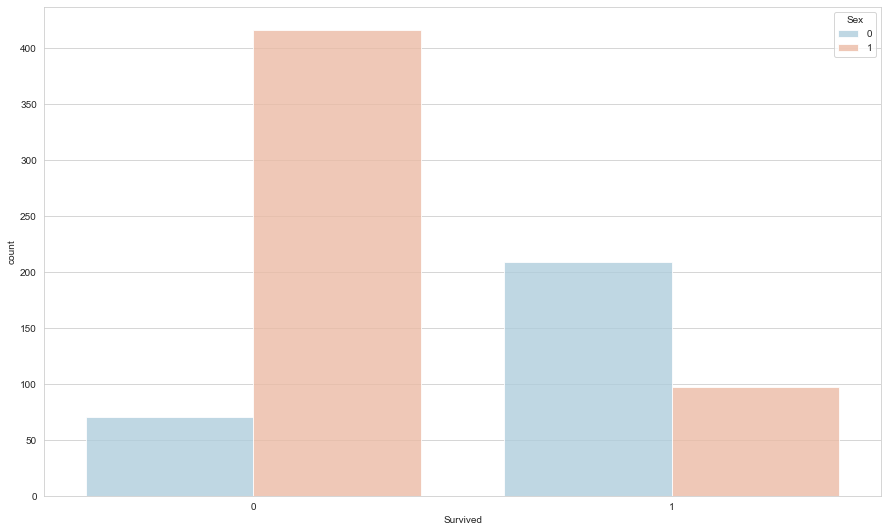

In [7]:
plt.figure (figsize= (15, 9))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data, hue='Sex', palette='RdBu_r', alpha = 0.8)

In [8]:
418+100+201+70

789

 à peu près on a parmi les hommes 418 non_survivants et 100 survivants.    
 Pour les femmes, on a environs 70 nn_survivants et 205 survivants.
 
 
 On a donc estimé un total de 789 sur une base de 792 Passagers

In [9]:
# Même chose que le précédent graphe

plt.figure(figsize=(12, 8))
plt.hist([
    data.loc[data.Survived == 0, "Sex"], 
    data.loc[data.Survived == 1, "Sex"]], 
    label=["non_Survived", "survived"], alpha= 0.5)

plt.grid(ls="--")
plt.legend(loc="upper center", ncol=2)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [10]:
surv_age = data.groupby(["Survived", "Sex"]).Age.mean()
surv_age

Survived  Sex
0         0      0.322143
          1      0.387485
1         0      0.351914
          1      0.354178
Name: Age, dtype: float64

In [11]:
plt.figure(figsize=(12, 8))
plt.hist([
    data.loc[data.Survived == 0, "Age"], 
    data.loc[data.Survived == 1, "Age"]], 
    label=["non_Survived", "survived"], alpha= 0.5)

plt.grid(ls="--")
plt.legend(loc="upper center", ncol=2)

Ici on a une répartition des survivants et morts selon leur age, on pourra dire que la majorité des personnes qui n'ont pas survécu durant ce drame sont des personnes agées entre [X , Y], (on ne pourra pas donner de valeur parce que l'age n'est pas défini de façon discrète).

### Décomposition de la base data en target et en variables explicatives

Dans la base titanic il y'a une colonne survived, le but est de faire un algo (reg logistique) et de prédire si un passengerId présent dans la base aurait survécu lors du nauffrage.

In [12]:
y = data["Survived"]
x = data.drop(data.columns[0], axis = 1)
y

0      0
1      1
2      1
3      1
4      0
      ..
787    0
788    1
789    0
790    0
791    0
Name: Survived, Length: 792, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3)    
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((554, 14), (554,), (238, 14), (238,))

In [14]:
reg_lin = linear_model.LogisticRegression()
reg_lin.fit (x_train, y_train)
reg_lin.score(x_train, y_train)

0.8321299638989169

Pour un score de 83%, on peut présumer que le modèle n'est pas du tout mal donc bien .

In [15]:
y_predict=reg_lin.predict(x_test)
print(y_predict)

[0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1]


In [16]:
survived = []
non_survived = []
for i in y_predict:
    if i == 1:
        survived.append(1)
    else:
        non_survived.append(0)
len(survived), len(non_survived)   

(67, 171)

On a 67 survivants et 171 selon notre prédiction sur la base test.

.

Nous allons voir maintenant la matrice de confusion pour mesurer la performance de notre modèle sur les prédictions 

In [17]:
confusion_matrix (y_test, y_predict)

array([[139,  15],
       [ 32,  52]])

On a 139 bonnes prédiction auxquelles les individus auraient survécus et 52 bonnes predictions auxquelles les individus n'auraient pas survécus. 

In [18]:
print (metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       154
           1       0.78      0.62      0.69        84

    accuracy                           0.80       238
   macro avg       0.79      0.76      0.77       238
weighted avg       0.80      0.80      0.80       238

